In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

##  Generator Class

![image.png](attachment:image.png)

Fig.2 A schematic representation of GANs. Please note the part of the generator and its resem- blance to density networks.
The **Generator** is a neural network that transforms random noise vector $ z $ into a generated sample $ x $. The generator network is a simple feedforward neural network, where we apply a neural network to the latent space $ z $ to generate synthetic data $ x $.
- **Generator Class**: Defines a neural network that generates fake data from random latent vectors $ z $.
- **Discriminator Class**: Defines a neural network that classifies data as real or fake.
- **Min-Max Objective**: The generator and discriminator optimize the following loss function:
  
  $$
  \min_{\theta_G} \max_{\theta_D} \mathbb{E}_{x \sim p_{\text{data}}(x)} [\log D(x)] + \mathbb{E}_{z \sim p_z(z)} [\log(1 - D(G(z)))]
  $$
  
  This ensures the generator learns to produce more realistic data, and the discriminator learns to distinguish real from fake data effectively.

- **GAN Setup**: Both the generator and the discriminator are learned using backpropagation and gradient descent, where the generator and discriminator continuously improve through adversarial training.


- **Generator Loss**:
  $$
  \log(1 - D(G(z)))
  $$
  
- **Discriminator Loss**:
  $$
  - \left( \log(D(x)) + \log(1 - D(G(z))) \right)
  $$
### Conclusion:
The generator class is implemented as follows:

### Generator Class Code

```python
import torch
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self, generator_net, z_size):
        super(Generator, self).__init__()
        
        # Initialize the generator neural network
        self.generator_net = generator_net
        
        # Size of the latent vector z
        self.z_size = z_size

    def generate(self, z):
        """ Generate data from latent z """
        return self.generator_net(z)

    def sample(self, batch_size=16):
        """ Sample random latents and generate data """
        z = torch.randn(batch_size, self.z_size)  # Latent sampling
        return self.generate(z)

    def forward(self, z=None):
        """ Forward pass, use generate if z is provided """
        if z is None:
            return self.sample()  # If z is None, sample randomly
        else:
            return self.generate(z)  # If z is provided, generate from it
class Discriminator(nn.Module):
    def __init__(self, discriminator_net):
        super(Discriminator, self).__init__()
        
        # Initialize the discriminator neural network
        self.discriminator_net = discriminator_net

    def forward(self, x):
        """ Forward pass for discriminator """
        return self.discriminator_net(x)  # Apply the neural network to input data




This markdown cell in Jupyter is designed to provide a high-level understanding of GAN components and their implementation in neural networks. By using deep learning, we can successfully implement GANs to generate realistic data from random noise.

##  Discriminator Class

The **Discriminator** is a simple neural network that classifies input data as either **real** or **fake**. The code for the **Discriminator** class is as follows:

### Discriminator Class Code

```python
import torch
import torch.nn as nn

class Discriminator(nn.Module):
    def __init__(self, discriminator_net):
        super(Discriminator, self).__init__()
        
        # Initialize the discriminator neural network
        self.discriminator_net = discriminator_net

    def forward(self, x):
        """ Forward pass for discriminator """
        return self.discriminator_net(x)  # Apply the neural network to input data

    class GAN(nn.Module):
    def __init__(self, generator, discriminator, EPS=1.e-5):
        super(GAN, self).__init__()
        
        print('GAN by JT.')
        
        # Initialize the generator and discriminator
        self.generator = generator
        self.discriminator = discriminator
        
        # Numerical stability
        self.EPS = EPS

    def forward(self, x_real, reduction='avg', mode='discriminator'):
        """
        The forward pass calculates the adversarial loss for either the generator or the discriminator.
        """
        if mode == 'generator':
            # Sample fake data using the generator
            x_fake_gen = self.generator.sample(x_real.shape[0])
            
            # Calculate the discriminator's output for fake data
            d_fake = torch.clamp(self.discriminator(x_fake_gen), self.EPS, 1. - self.EPS)
            
            # The generator's loss is log(1 - D(G(z))).
            loss = torch.log(1. - d_fake)
        
        elif mode == 'discriminator':
            # Sample fake data using the generator
            x_fake_gen = self.generator.sample(x_real.shape[0])
            
            # Calculate the discriminator's output for fake data
            d_fake = torch.clamp(self.discriminator(x_fake_gen), self.EPS, 1. - self.EPS)
            
            # Calculate the discriminator's output for real data
            d_real = torch.clamp(self.discriminator(x_real), self.EPS, 1. - self.EPS)
            
            # The discriminator's final loss is log(1 - D(G(z))) + log(D(x)).
            loss = -(torch.log(d_real) + torch.log(1. - d_fake))

        if reduction == 'sum':
            return loss.sum()
        else:
            return loss.mean()

    def sample(self, batch_size=64):
        return self.generator.sample(batch_size=batch_size)

 # Generator architecture
generator_net = nn.Sequential(
    nn.Linear(L, M),   # First layer: L -> M
    nn.ReLU(),
    nn.Linear(M, D),   # Second layer: M -> D
    nn.Tanh()           # Output layer with Tanh activation
)

generator = Generator(generator_net, z_size=L)

# Discriminator architecture
discriminator_net = nn.Sequential(
    nn.Linear(D, M),   # First layer: D -> M
    nn.ReLU(),
    nn.Linear(M, 1),   # Output layer: M -> 1 (Real/Fake)
    nn.Sigmoid()       # Sigmoid activation to output a probability between 0 and 1
)

discriminator = Discriminator(discriminator_net)

# Initialize the full model
model = GAN(generator=generator, discriminator=discriminator)






In [1]:
import random
import math

class Generator:
    def __init__(self, generator_net, z_size):
        self.generator_net = generator_net
        self.z_size = z_size

    def generate(self, z):
        """ Generate fake data for a given latent vector z """
        return self.generator_net(z)

    def sample(self, batch_size=16):
        """ Sample random latent vectors from a normal distribution and generate fake data """
        z = [self.sample_latent_vector() for _ in range(batch_size)]
        return [self.generate(z_i) for z_i in z]

    def sample_latent_vector(self):
        """ Sample a latent vector z from a normal distribution """
        return [random.gauss(0, 1) for _ in range(self.z_size)]

class Discriminator:
    def __init__(self, discriminator_net):
        self.discriminator_net = discriminator_net

    def forward(self, x):
        """ Apply the discriminator network to the input """
        return self.discriminator_net(x)

class GAN:
    def __init__(self, generator, discriminator, EPS=1.e-5):
        self.generator = generator
        self.discriminator = discriminator
        self.EPS = EPS

    def forward(self, x_real, mode='discriminator', reduction='avg'):
        """ Calculate the adversarial loss for either generator or discriminator """
        if mode == 'generator':
            # Generator mode: sample fake data
            x_fake_gen = self.generator.sample(len(x_real))
            # Apply the discriminator to fake data
            d_fake = [self.discriminator.forward(x_fake) for x_fake in x_fake_gen]
            # Compute the loss for the generator
            loss = [math.log(1. - d) for d in d_fake]
        elif mode == 'discriminator':
            # Discriminator mode: sample fake data
            x_fake_gen = self.generator.sample(len(x_real))
            # Apply the discriminator to fake and real data
            d_fake = [self.discriminator.forward(x_fake) for x_fake in x_fake_gen]
            d_real = [self.discriminator.forward(x) for x in x_real]
            # Compute the loss for the discriminator
            loss = [-(math.log(d_r) + math.log(1. - d_f)) for d_r, d_f in zip(d_real, d_fake)]

        if reduction == 'sum':
            return sum(loss)
        else:
            return sum(loss) / len(loss)

    def sample(self, batch_size=64):
        """ Sample fake data using the generator """
        return self.generator.sample(batch_size)

# Example of a generator and discriminator architecture

# Example of a simple feedforward network for the generator
def simple_generator_net(z):
    """ A simple generator network that takes latent vector z and generates fake data """
    return [sum(z) * 0.5 + random.gauss(0, 0.1) for _ in range(10)]  # output size of 10

# Example of a simple feedforward network for the discriminator
def simple_discriminator_net(x):
    """ A simple discriminator network that takes data and outputs a probability """
    return 1 / (1 + math.exp(-sum(x)))  # Sigmoid function as output

# Initialize the generator and discriminator
generator = Generator(simple_generator_net, z_size=5)  # Latent vector size 5
discriminator = Discriminator(simple_discriminator_net)

# Initialize the GAN
gan = GAN(generator=generator, discriminator=discriminator)

# Example: Train the GAN (simplified for the example)
x_real = [[random.gauss(0, 1) for _ in range(10)] for _ in range(50)]  # Real data

# Compute loss for the generator
gen_loss = gan.forward(x_real, mode='generator', reduction='avg')
print(f'Generator Loss: {gen_loss}')

# Compute loss for the discriminator
disc_loss = gan.forward(x_real, mode='discriminator', reduction='avg')
print(f'Discriminator Loss: {disc_loss}')


Generator Loss: -5.483521892243974
Discriminator Loss: 5.4262855127300735


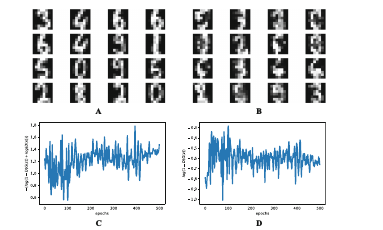

Fig.3 Examples of results after training GANs: (a) Real images. (b) Fake images. (c) The validation curve for the discriminator. (d) The validation curve for the generator.
###  Results and Comments

In the experiments, we normalized images and scaled them to \([-1, 1]\) as we did for EBMs. After running it, you can expect similar results to those in **Fig.3**. In the previous chapters, we did not comment on the results. However, we make an exception here. 

Please note, my curious reader, that now we do not have a nicely converging objective. On the contrary, the adversarial loss or its generating part is jumping all over the place. That is a known fact following the **min-max optimization problem**. Moreover, the loss is learnable now, so it is troublesome to say where the optimal solution is since we update the loss function as well. 

Another important piece of information is that **training GANs is indeed a pain**. First, it is hard to decipher and properly understand the values of adversarial loss. Second, learning is rather slow and requires many iterations (by many I mean hundreds if not thousands). 

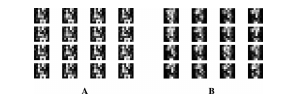

Fig.4 Generated images after (a) 10 epochs of training and (b) 50 epochs of training.

If you look into generations in the first few epochs (e.g., see **Fig.4**), you may be discouraged because a model may seem to overfit. That is the problem; we must be really patient to see whether we are on the right track. Moreover, you may also need to pay special attention to hyperparameters, e.g., learning rates. It requires a bit of experience or simply time to play around with learning rate values in your problem.


### Ideas

I would not even dare to mention a small fraction of them. The field of implicit modeling with GANs is growing constantly. I will try to point to a few important papers:

- **Conditional GANs**: An important extension of GANs is allowing them to generate data conditionally \([7]\).
- **GANs with encoders**: An interesting question is whether we can extend conditional GANs to a framework with encoders. It turns out that it is possible; see **BiGAN** \([8]\) and **ALI** \([9]\) for details.
- **StyleGAN and CycleGAN**: The flexibility of GANs could be utilized in formulating specialized image synthesizers. For instance, **StyleGAN** is formulated in such a way to transfer style between images \([10]\), while **CycleGAN** tries to "translate" one image into another, e.g., a horse into a zebra \([11]\).
- **Wasserstein GANs**: In \([12]\), it was claimed that the adversarial loss could be formulated differently using the Wasserstein distance (a.k.a. the earth-mover distance), that is:
  
  $$
  \ell_W(\alpha, \beta) = \mathbb{E}_{x \sim p_{\text{real}}} [D_{\alpha}(x)] - \mathbb{E}_{z \sim p(z)} [D_{\alpha}(G_{\beta}(z))],
  $$

  where $ D_{\alpha}(\cdot) $ must be a 1-Lipschitz function. The simpler way to achieve that is by clipping the weight of the discriminator to some small value \(c\). Alternatively, spectral normalization could be applied \([13]\) by using the power iteration method. Overall, constraining the discriminator to be a 1-Lipschitz function stabilizes training; however, it is still hard to comprehend the learning process.
  
- **f-GANs**: The **Wasserstein GAN** indicated that we can look elsewhere for alternative formulations of the adversarial loss. In \([14]\), it is advocated to use **f-divergences** for that.
  
- **Generative moment matching networks** \([15, 16]\): As mentioned earlier, we could use other metrics instead of the likelihood function. We can fix the discriminator and define it as the maximum mean discrepancy with a given kernel function. The resulting problem is simpler because we do not train the discriminator; thus, we get rid of the cumbersome min-max optimization. However, the final quality of synthesized images is typically poorer.
  
- **Density difference vs. density ratio**: An interesting perspective is presented in $[17, 18]$ where we can see various GANs either as a difference of densities or a ratio of densities. I refer to the original papers for further details.
  
- **Hierarchical implicit models**: The idea of defining implicit models could be extended to hierarchical models $[19]$.
  
- **GANs and EBMs**: If you recall the **EBMs**, you may notice that there is a clear connection between the adversarial loss and the logarithm of the Boltzmann distribution. In $[20, 21]$, it was noticed that introducing a variational distribution over observables, $ q(x) $, leads to the following objective:
  
  $$
  J(x) = \mathbb{E}_{x \sim p_{\text{data}}(x)} [E(x)] - \mathbb{E}_{x \sim q(x)} [E(x)] + H[q(x)],
  $$

  where $E(x)$ is the energy function and $H[q(x)]$ is the entropy of the distribution $q(x)$.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Generator for Conditional GAN
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim, condition_dim):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(input_dim + condition_dim, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, output_dim)
        self.tanh = nn.Tanh()

    def forward(self, z, label):
        x = torch.cat([z, label], dim=-1)  # Concatenate noise and label
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.tanh(self.fc3(x))
        return x

# Discriminator for Conditional GAN
class Discriminator(nn.Module):
    def __init__(self, input_dim, condition_dim):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(input_dim + condition_dim, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x, label):
        x = torch.cat([x, label], dim=-1)  # Concatenate image and label
        x = torch.leaky_relu(self.fc1(x), 0.2)
        x = torch.leaky_relu(self.fc2(x), 0.2)
        x = self.sigmoid(self.fc3(x))
        return x

# Initialize the generator and discriminator
input_dim = 100
output_dim = 784  # Example: Flattened 28x28 images (MNIST)
condition_dim = 10  # Example: 10 classes
generator = Generator(input_dim, output_dim, condition_dim)
discriminator = Discriminator(output_dim, condition_dim)

# Optimizers
lr = 0.0002
optimizer_g = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_d = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

# Loss function
criterion = nn.BCELoss()

 #Wasserstein GAN (WGAN)
    class WGAN_Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(WGAN_Generator, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, output_dim)
        self.tanh = nn.Tanh()

    def forward(self, z):
        x = torch.relu(self.fc1(z))
        x = torch.relu(self.fc2(x))
        x = self.tanh(self.fc3(x))
        return x

class WGAN_Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(WGAN_Discriminator, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 1)

    def forward(self, x):
        x = torch.leaky_relu(self.fc1(x), 0.2)
        x = torch.leaky_relu(self.fc2(x), 0.2)
        x = self.fc3(x)
        return x

# Gradient penalty function for WGAN
def gradient_penalty(real_data, fake_data, discriminator, device='cpu'):
    batch_size = real_data.size(0)
    epsilon = torch.rand(batch_size, 1).to(device)
    interpolates = epsilon * real_data + (1 - epsilon) * fake_data
    interpolates.requires_grad_(True)
    
    d_interpolates = discriminator(interpolates)
    grad_outputs = torch.ones(d_interpolates.size()).to(device)
    
    gradients = torch.autograd.grad(outputs=d_interpolates, inputs=interpolates,
                                    grad_outputs=grad_outputs, create_graph=True, retain_graph=True, only_inputs=True)[0]
    
    gradients = gradients.view(batch_size, -1)
    grad_norm = gradients.norm(2, dim=1)
    gp = ((grad_norm - 1) ** 2).mean()
    return gp

# Example usage of the WGAN
z = torch.randn(64, input_dim)  # Random noise for generation
real_data = torch.randn(64, output_dim)  # Fake data for discriminator
fake_data = generator(z)  # Fake data generated by the generator

# Train discriminator and generator
for epoch in range(1000):
    optimizer_d.zero_grad()
    d_real = discriminator(real_data)
    d_fake = discriminator(fake_data.detach())
    
    gp = gradient_penalty(real_data, fake_data.detach(), discriminator)
    d_loss = -torch.mean(d_real) + torch.mean(d_fake) + 10 * gp  # WGAN loss with gradient penalty
    d_loss.backward()
    optimizer_d.step()
    
    optimizer_g.zero_grad()
    g_loss = -torch.mean(discriminator(fake_data))  # Generator loss
    g_loss.backward()
    optimizer_g.step()

    # fGAN
    
    class fGAN_Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(fGAN_Discriminator, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# f-Divergence loss using a specific f-function (e.g., the Kullback-Leibler divergence)
def f_divergence_loss(p, q, discriminator):
    log_ratio = discriminator(p) - discriminator(q)
    return torch.mean(torch.exp(log_ratio) - log_ratio - 1)

# Example usage in training
real_data = torch.randn(64, output_dim)
fake_data = generator(z)
f_loss = f_divergence_loss(real_data, fake_data, discriminator)

#Training
for epoch in range(100):
    # Sample real data and generate fake data
    real_data = get_real_data(batch_size=64)  # Replace with actual data loading
    z = torch.randn(64, input_dim)
    fake_data = generator(z)
    
    # Update discriminator
    optimizer_d.zero_grad()
    d_loss = discriminator_loss(real_data, fake_data)
    d_loss.backward()
    optimizer_d.step()
    
    # Update generator
    optimizer_g.zero_grad()
    g_loss = generator_loss(fake_data)
    g_loss.backward()
    optimizer_g.step()

    print(f'Epoch [{epoch}/{100}], D Loss: {d_loss.item()}, G Loss: {g_loss.item()}')
for epoch in range(100):
    # Sample real data and generate fake data
    real_data = get_real_data(batch_size=64)  # Replace with actual data loading
    z = torch.randn(64, input_dim)
    fake_data = generator(z)
    
    # Update discriminator
    optimizer_d.zero_grad()
    d_loss = discriminator_loss(real_data, fake_data)
    d_loss.backward()
    optimizer_d.step()
    
    # Update generator
    optimizer_g.zero_grad()
    g_loss = generator_loss(fake_data)
    g_loss.backward()
    optimizer_g.step()

    print(f'Epoch [{epoch}/{100}], D Loss: {d_loss.item()}, G Loss: {g_loss.item()}')

    